# Mall Customers Analysis & Segmentation
- EDA
- Preprocessing
- Finding an optimal k value for Kmeans
- Kmeans clustering model to segment and predict future
- Customer segmentation
- Conclusion

## EDA

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading the dataset from CSV file into a Pandas DataFrame
## https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
df = pd.read_csv("./data/datasets/Mall_Customers.csv")

In [3]:
# Looking at a small sample
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
96,97,Female,47,60,47
50,51,Female,49,42,52
151,152,Male,39,78,88
88,89,Female,34,58,60
159,160,Female,30,78,73


In [4]:
# Shape of the DataFrame
df.shape

(200, 5)

In [5]:
# General information on fields of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df["Gender"] = pd.Categorical(df["Gender"]) # casting from object to category
df.drop(columns=["CustomerID"], inplace=True) # customer ID is not a point of interest for this work

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Gender                  200 non-null    category
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 5.1 KB


In [8]:
# Descriptive statistics of numerical columns
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [9]:
# Checking null values
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
# Checking duplicate records
df.duplicated().sum()

np.int64(0)

The data looks clean overall, no null values, no duplicate records, data types fit to the values, descriptive statistics look reasonable and consistent. Lets plot the data to see if we can spot anything else (e.g. any inconsistencies, outliers, errors, point of interests to dive into)

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

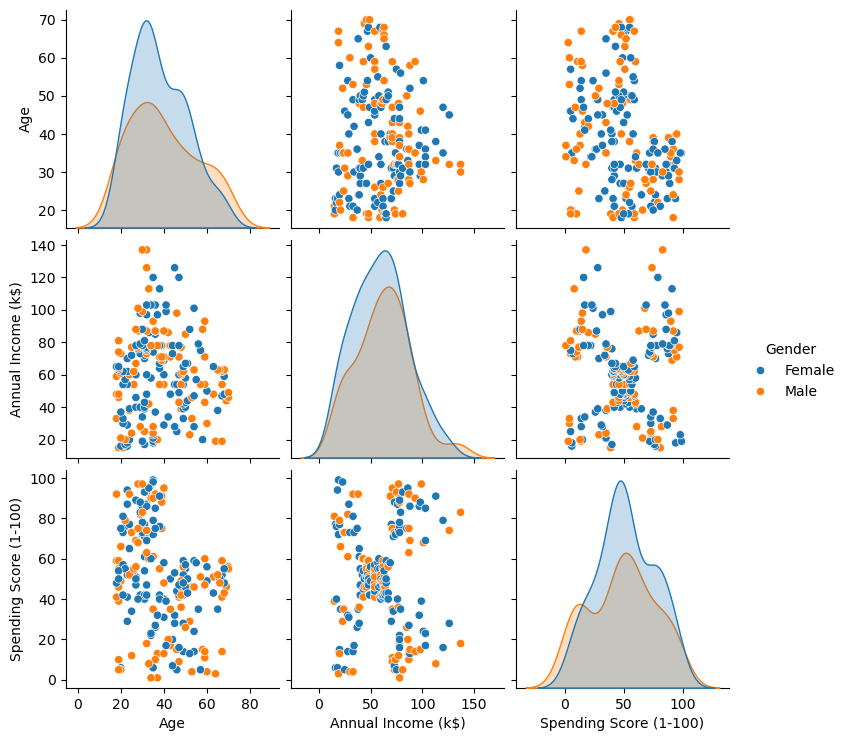

In [12]:
# PAIRPLOT OF ALL THE DATA HUE BY GENDER (3 different numerical values against our only categorical value
sns.pairplot(df, hue="Gender")

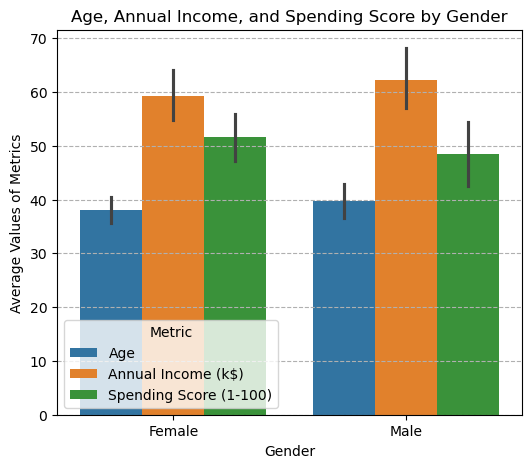

In [13]:
# BAR CHART FOR GENDER AGAINST 3 NUMERICAL VALUES

# Melt to a temporary dataframe for the visualization
df_melted = df.melt(id_vars="Gender", value_vars=["Age", "Annual Income (k$)", "Spending Score (1-100)"])

plt.figure(figsize=(6,5))
sns.barplot(data=df_melted, x="Gender", y="value", hue="variable", estimator="mean", errorbar="ci")

plt.title("Age, Annual Income, and Spending Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Values of Metrics")
plt.legend(title="Metric")
plt.grid(True, linestyle='--', axis="y")
plt.show()

- Gender: Considering the bar chart, confidence intervals and the pair plot, there seems to be no significant difference, and this can be statistically tested if we want to dive deeper into gender.

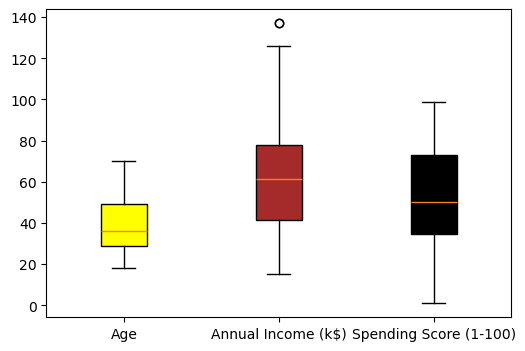

In [14]:
# CHECKING OUTLIERS WITH BOXPLOTS

data_interested = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]
#sns.boxplot(data=data_interested)

plt.figure(figsize=(6,4))
ax = plt.subplot(111)
boxplot = ax.boxplot(data_interested, vert=True, patch_artist=True)
ax.set_xticklabels(data_interested.columns)

colors = ["yellow", "brown", "black"]
for patch, color in zip(boxplot["boxes"], colors):
    patch.set_facecolor(color)

plt.show()

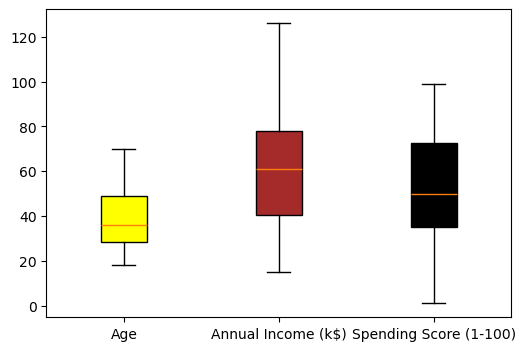

In [15]:
# Removing outliers and plotting again
df = df.drop([199,198]) # sorted the df and selected based on the dots outside of whiskers above

data_interested = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]]

plt.figure(figsize=(6,4))
ax = plt.subplot(111)
boxplot = ax.boxplot(data_interested, vert=True, patch_artist=True)
ax.set_xticklabels(data_interested.columns)

colors = ["yellow", "brown", "black"]
for patch, color in zip(boxplot["boxes"], colors):
    patch.set_facecolor(color)

plt.show()

- Outliers removed

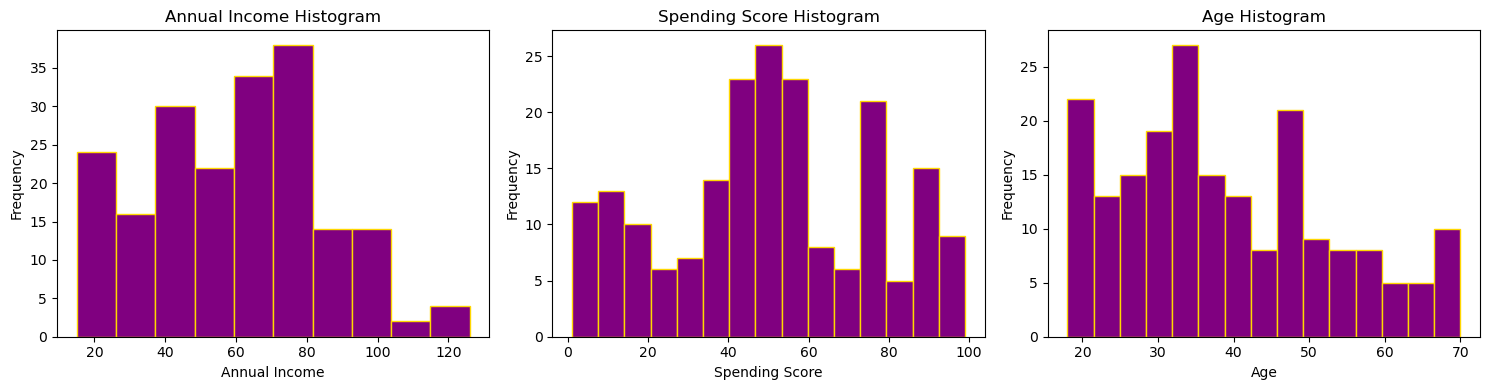

In [16]:
# LOOKING AT DISTRIBUTIONS WITH BAR CHARTS

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))  # 1 row, 3 columns

# Histogram 1: Annual Income
axes[0].hist(df["Annual Income (k$)"], bins=10, color="purple", edgecolor="gold")
axes[0].set_title("Annual Income Histogram")
axes[0].set_xlabel("Annual Income")
axes[0].set_ylabel("Frequency")

# Histogram 2: Spending Score
axes[1].hist(df["Spending Score (1-100)"], bins=15, color="purple", edgecolor="gold")
axes[1].set_title("Spending Score Histogram")
axes[1].set_xlabel("Spending Score")
axes[1].set_ylabel("Frequency")

# Histogram 3: Age
axes[2].hist(df["Age"], bins=15, color="purple", edgecolor="gold")
axes[2].set_title("Age Histogram")
axes[2].set_xlabel("Age")
axes[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

- Annual Income (k$) - seems slightly right skewed
- Spending Score (1-100) - seems normally distributed
- Age - seems slightly right skewed

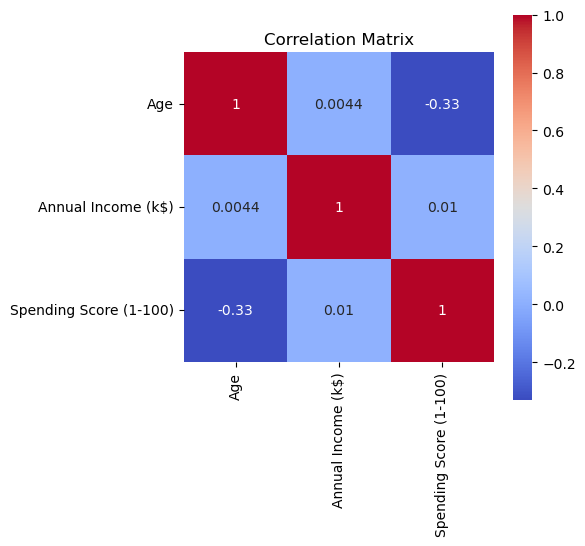

In [17]:
# CORRELATION MATRIX
correlation_matrix = df.drop(columns=["Gender"]).corr()

plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, square=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

- There seems to be no strong correlation between these features. Yet although it's not strong, there seems to be a negative correlation between age and spending score, might worth investigating or including in models.

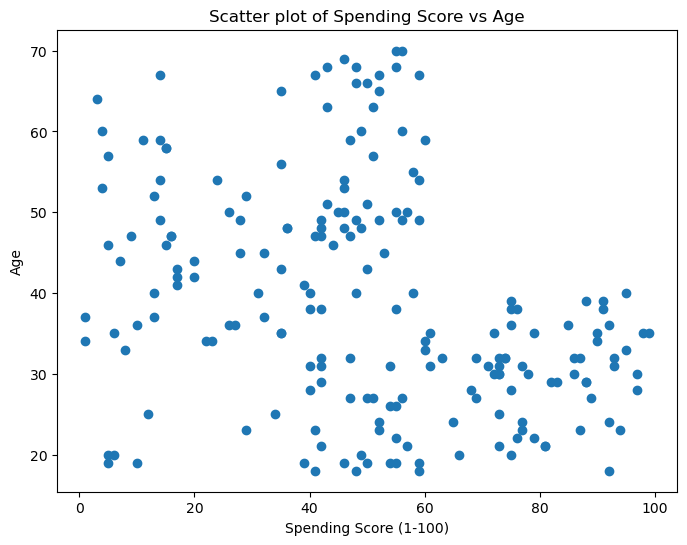

In [18]:
# PLOTTING Spending Score vs Age
plt.figure(figsize=(8,6))
plt.scatter(df["Spending Score (1-100)"], df["Age"])

plt.title("Scatter plot of Spending Score vs Age")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Age")

plt.show()

- scatter plot somewhat supports the correlation matrix output.

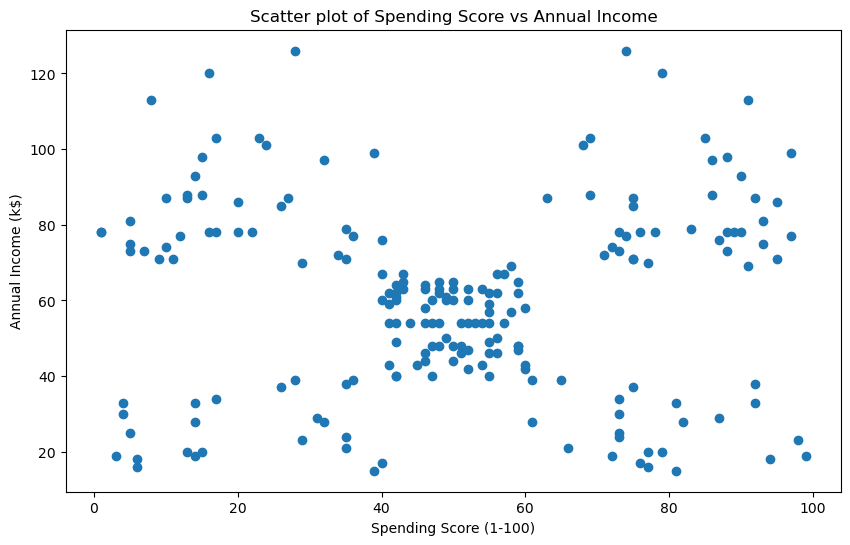

In [19]:
# PLOTTING Spending Score vs Annual Income to spot patterns
plt.figure(figsize=(10,6))
plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"])

plt.title("Scatter plot of Spending Score vs Annual Income")
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")

plt.show()

- We can do feature engineering on Annual Income and Spending Score for useful purposes. To make it more meaningful we can build our K Means clustering model on these values. 

## K means Clustering

### Investigating optimum k value

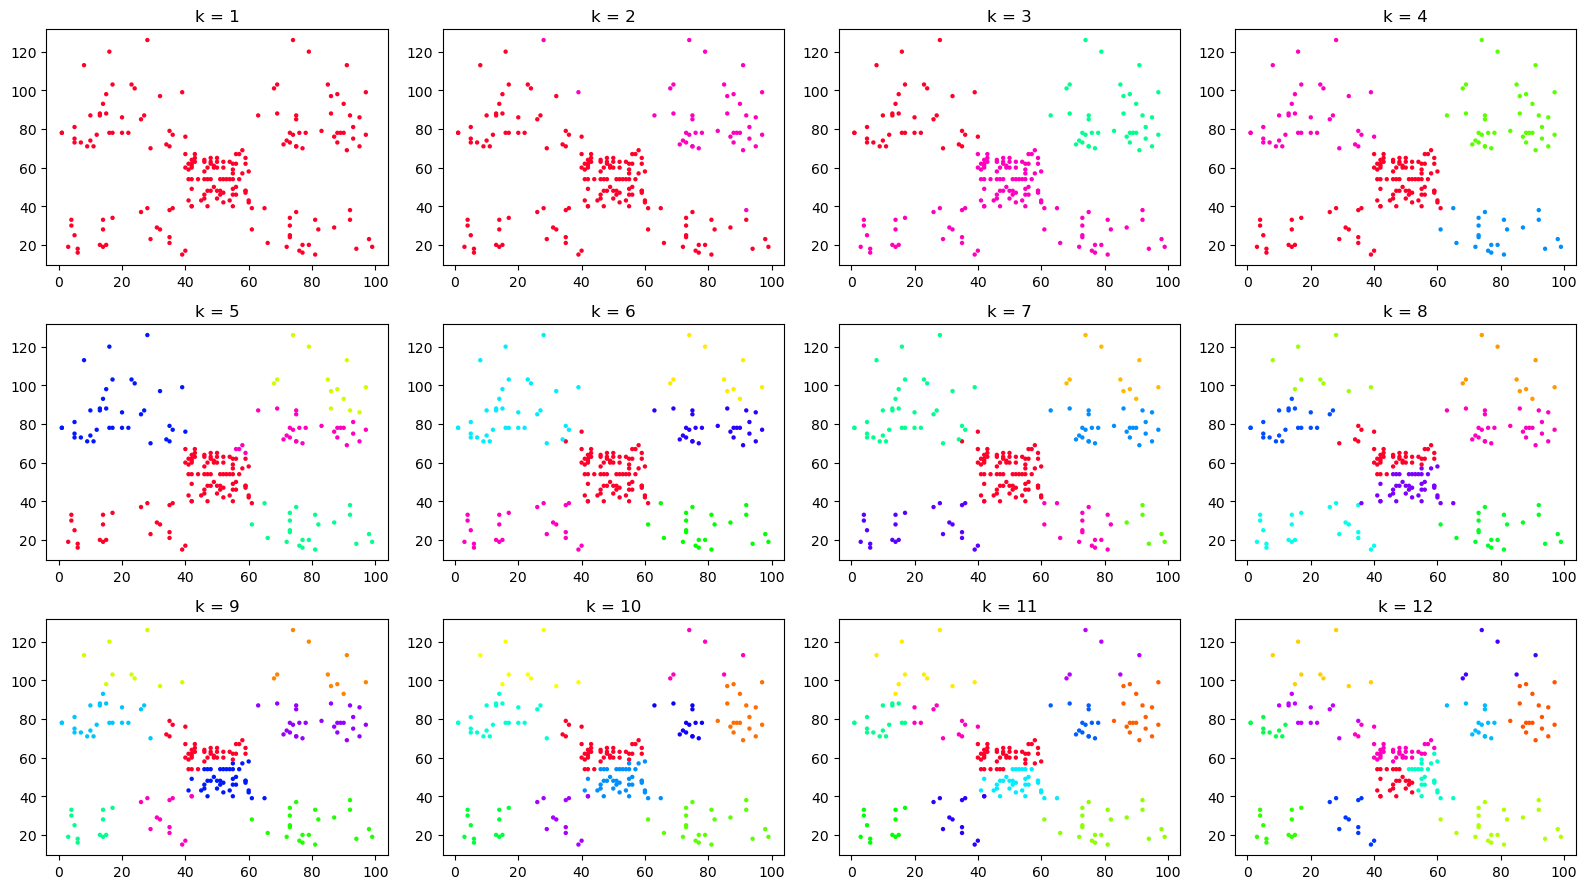

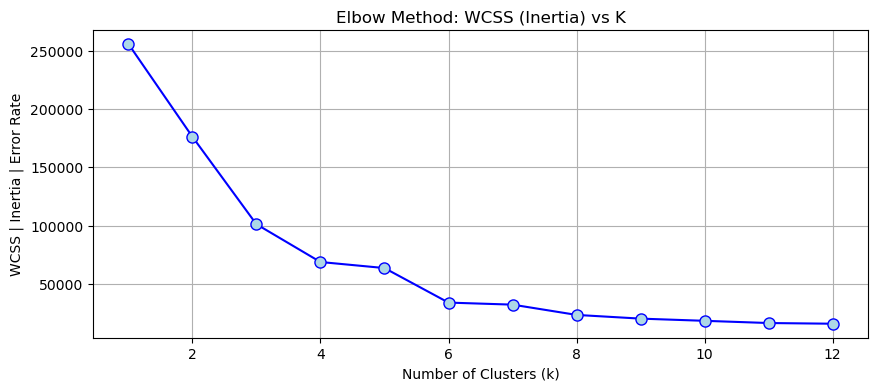

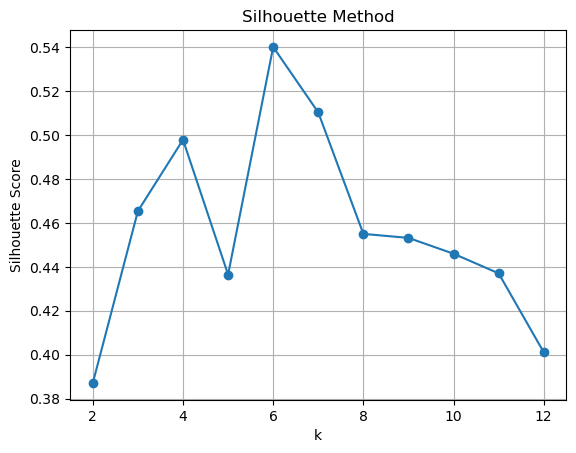

In [20]:
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')
# #UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


X = np.array(df[["Spending Score (1-100)", "Annual Income (k$)"]])

maxk = 13

# for elbow method
wcss = np.zeros(maxk)

# for silhouette score
silhouette = np.zeros(maxk)

# for sub plots for each clustering with increasing k values
fig, axes = plt.subplots(3, 4, figsize=(16,9))

# flatten
axes = [ax for axrow in axes for ax in axrow]



for k, ax in zip(range(1, maxk), axes):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y = kmeans.fit_predict(X)
    
    ax.scatter(X[:,0], X[:,1], c=y, linewidths=0, s=10, cmap="gist_rainbow")
    ax.set_title(f"k = {k}")

    # Storing inertia values for each k value
    wcss[k] = kmeans.inertia_

    # Storing silhouette scores for each k value
    if k > 1:
        silhouette[k] = silhouette_score(X,y)

plt.tight_layout()
plt.show()


## Elbow method line graph
plt.figure(figsize=(10, 4))
plt.plot(range(1, maxk), wcss[1:maxk], marker="o", color="blue", linestyle="-", markerfacecolor="lightblue", markersize=8)
plt.title("Elbow Method: WCSS (Inertia) vs K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS | Inertia | Error Rate")
plt.grid(True)
plt.show()


## Silhouette score line graph
plt.plot(range(2, maxk), silhouette[2:maxk], marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.grid(True)
plt.show()

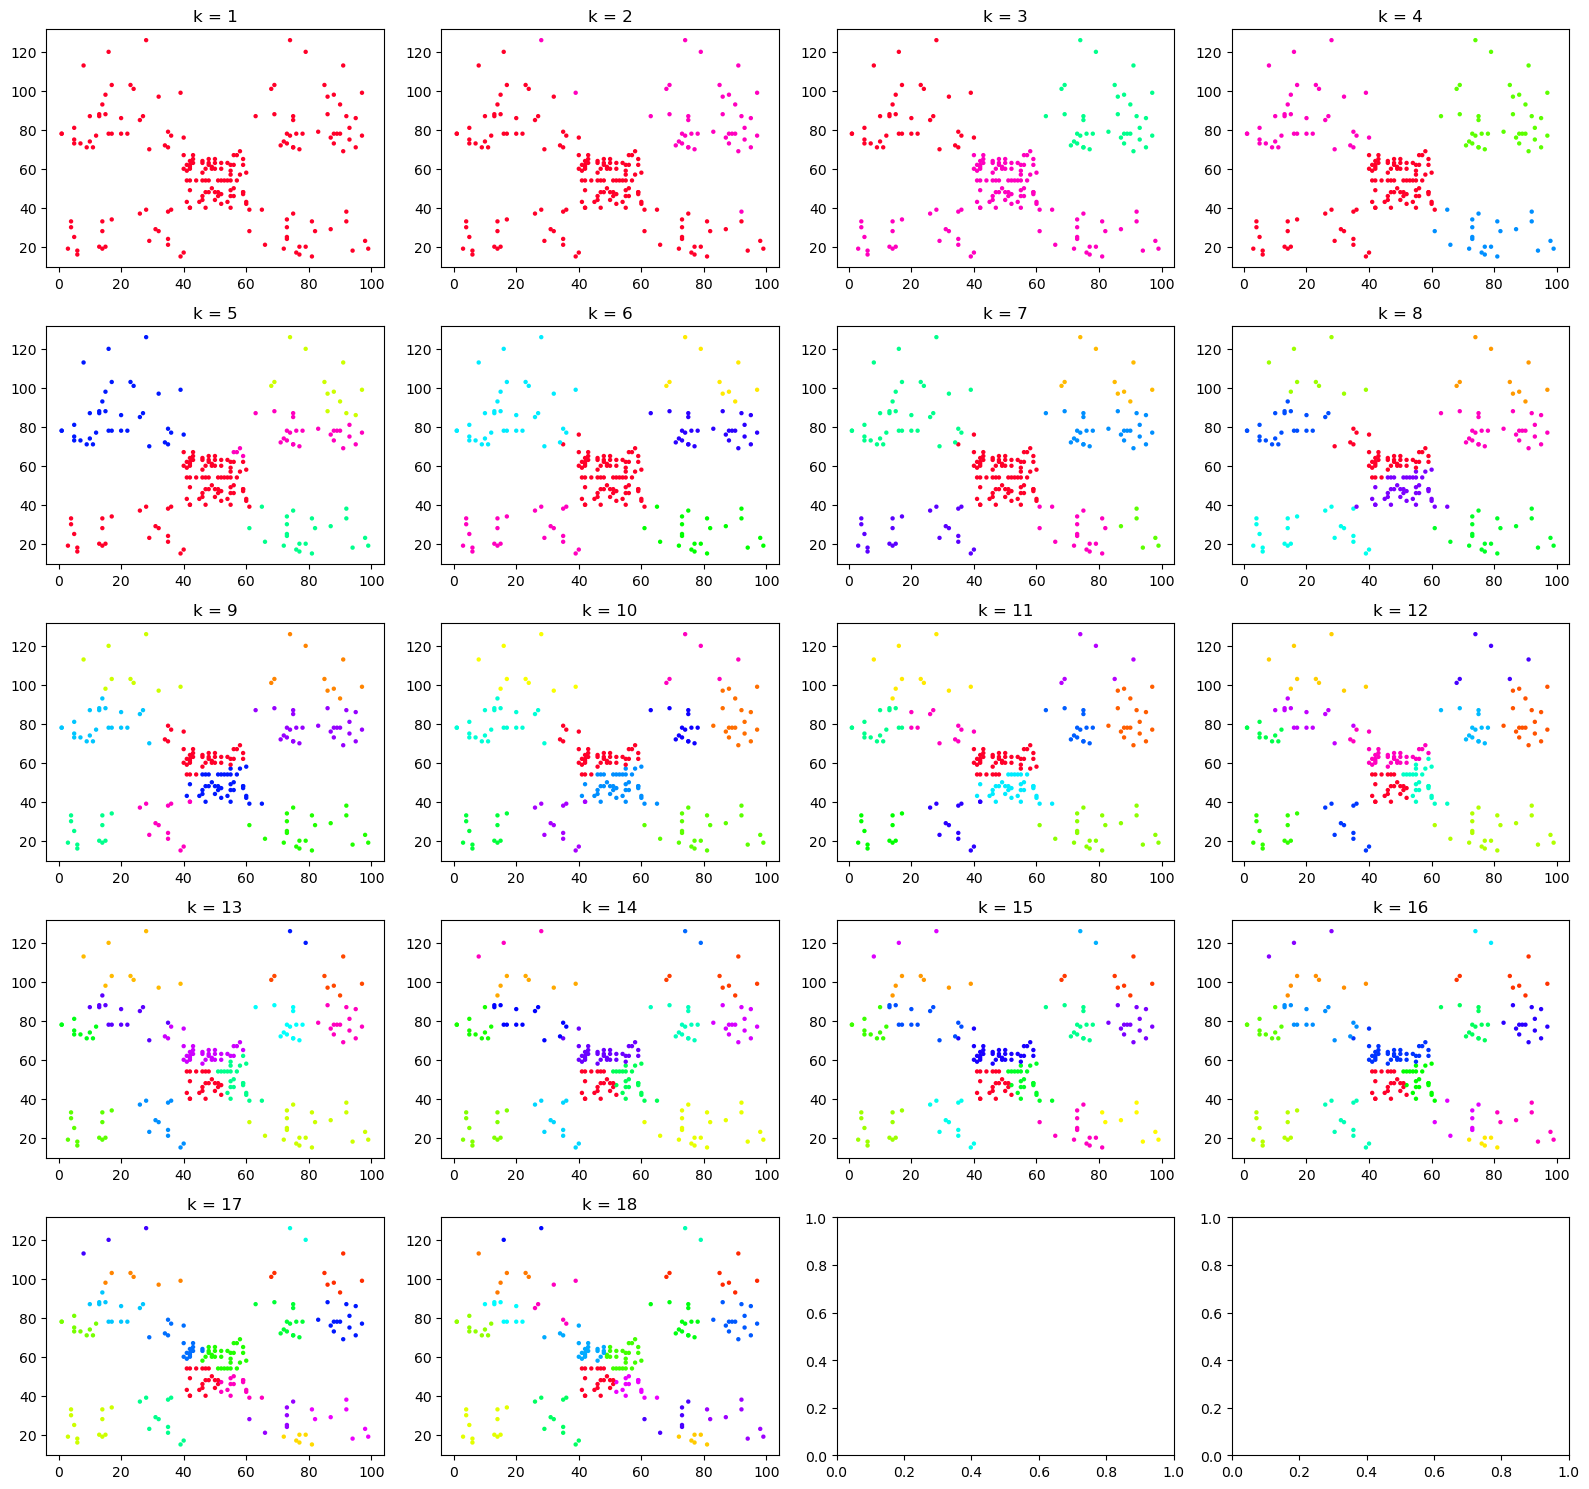

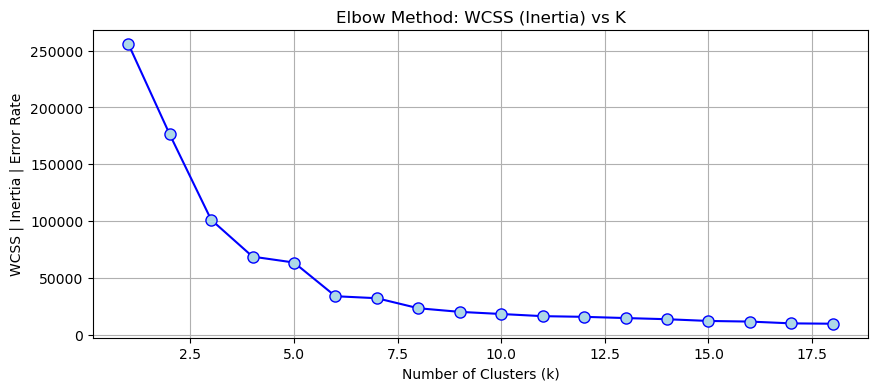

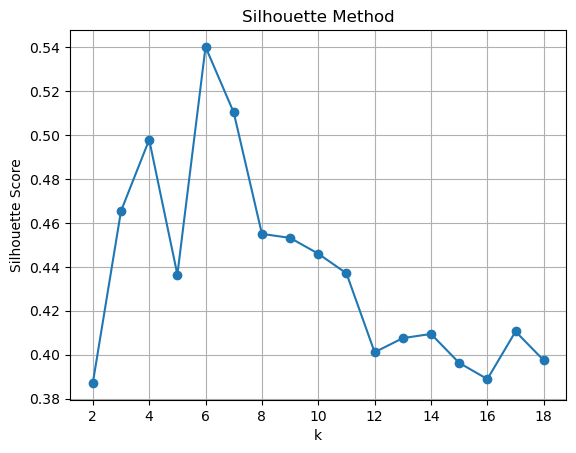

In [21]:
from sklearn.cluster import KMeans
import itertools
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')
# #UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


X = np.array(df[["Spending Score (1-100)", "Annual Income (k$)"]])

maxk = 19

import math
num_plots = maxk
cols = 4
rows = math.ceil(num_plots / cols)

fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 3))
axes = axes.flatten()





# for elbow method
wcss = np.zeros(maxk)

# for silhouette score
silhouette = np.zeros(maxk)

# # for sub plots for each clustering with increasing k values
# fig, axes = plt.subplots(3, 4, figsize=(16,9))

# # flatten
# axes = [ax for axrow in axes for ax in axrow]



for k, ax in zip(range(1, maxk), axes):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y = kmeans.fit_predict(X)
    
    ax.scatter(X[:,0], X[:,1], c=y, linewidths=0, s=10, cmap="gist_rainbow")
    ax.set_title(f"k = {k}")

    # Storing inertia values for each k value
    wcss[k] = kmeans.inertia_

    # Storing silhouette scores for each k value
    if k > 1:
        silhouette[k] = silhouette_score(X,y)

plt.tight_layout()
plt.show()


## Elbow method line graph
plt.figure(figsize=(10, 4))
plt.plot(range(1, maxk), wcss[1:maxk], marker="o", color="blue", linestyle="-", markerfacecolor="lightblue", markersize=8)
plt.title("Elbow Method: WCSS (Inertia) vs K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS | Inertia | Error Rate")
plt.grid(True)
plt.show()


## Silhouette score line graph
plt.plot(range(2, maxk), silhouette[2:maxk], marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.grid(True)
plt.show()

- 6 seems to be the optimal k value considering the elbow method and the silhouette scores + the cluster visuals

## KMeans Model

In [22]:
from sklearn.cluster import KMeans

# Prepare the data to be fit
X = np.array(df[["Spending Score (1-100)", "Annual Income (k$)"]])

# Initialize the model with the decided params
kmeans_model = KMeans(n_clusters=6, random_state=42)

# Fit the model
kmeans_model.fit(X)

# Predict cluster labels
cluster_numbers = kmeans_model.predict(X)

# Add cluster numbers to the DataFrame
df["cluster_numbers"] = cluster_numbers 

In [23]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_numbers
0,Male,19,15,39,5
1,Male,21,15,81,2
2,Female,20,16,6,5
3,Female,23,16,77,2
4,Female,31,17,40,5


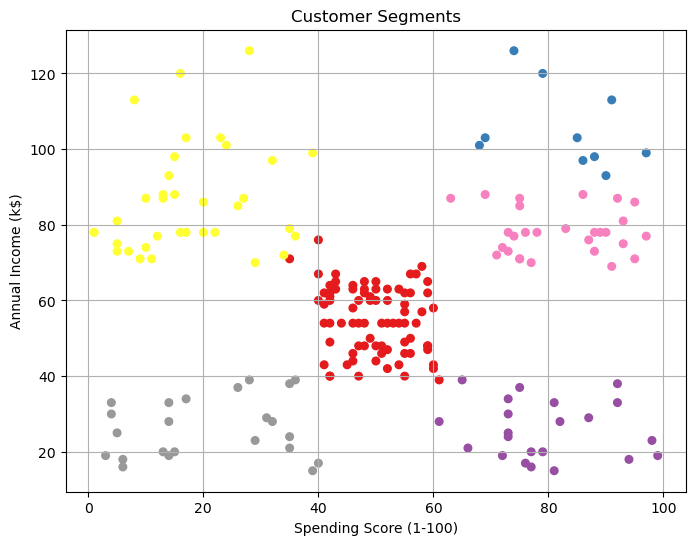

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=cluster_numbers, cmap="Set1", s=30)
# plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], c="black", marker="o", s=200) # to show center points
plt.xlabel("Spending Score (1-100)")
plt.ylabel("Annual Income (k$)")
plt.title("Customer Segments")
plt.grid(True)
plt.show()

In [25]:
# checked mean values of clusters to assign cluster labels to each cluster number
df.groupby("cluster_numbers")[["Annual Income (k$)", "Spending Score (1-100)"]].mean().sort_values(by=["Spending Score (1-100)", "Annual Income (k$)"])


label_mapping = {
    0: "Balancers",
    1: "Creme de la Creme",
    2: "Cows",
    3: "Question Marks",
    4: "Stars",
    5: "Dogs"
}


df["cluster_labels"] = df["cluster_numbers"].map(label_mapping)

In [26]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_numbers,cluster_labels
0,Male,19,15,39,5,Dogs
1,Male,21,15,81,2,Cows
2,Female,20,16,6,5,Dogs
3,Female,23,16,77,2,Cows
4,Female,31,17,40,5,Dogs


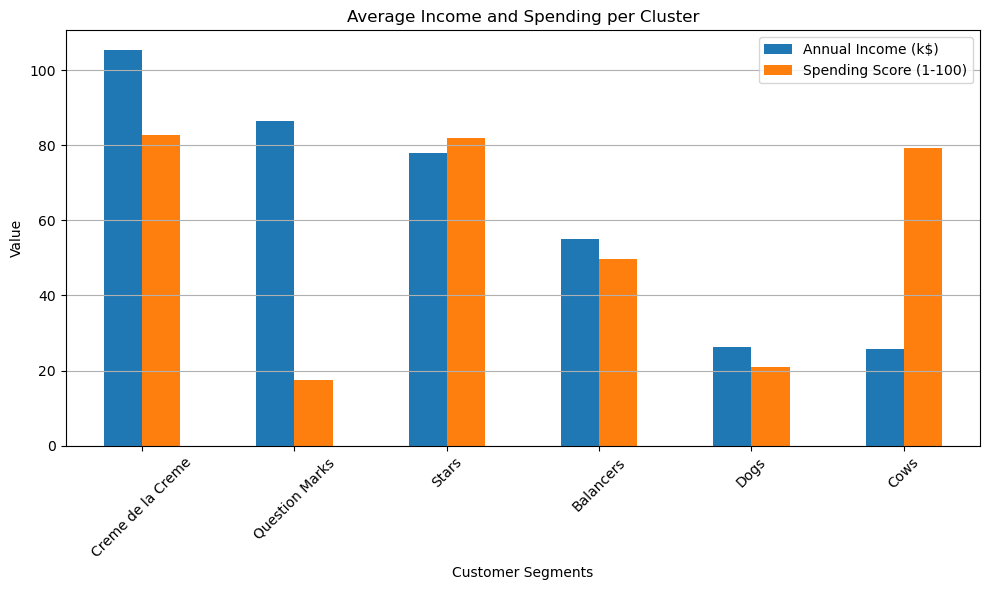

In [27]:
# Group by cluster label and compute mean values
cluster_summary = df.groupby("cluster_labels")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()

# Optional: sort labels in a meaningful order
cluster_summary = cluster_summary.sort_values(by="Annual Income (k$)", ascending=False)

# Plot bar chart
cluster_summary.plot(kind="bar", figsize=(10, 6))
plt.title("Average Income and Spending per Cluster")
plt.ylabel("Value")
plt.xlabel("Customer Segments")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Conclusion

- Within this analysis mall customers data was investigated. After doing an initial review and investigating features, using annual income and spending scores for clustering have been decided. We have meaningfully segmented our customers, have a model to classify future customers based on their behaviours, and we can use this information to make better decisions on our future marketing efforts.

Clusters, Explanations, Potential Future Approach
- Balancers
    - Moderate income and moderate spending score: They seem stable, not strongly engaged, and potentially they can lean towards any direction. We should aim to redirect them towards being stars by upselling and building loyalty.
- Dogs
    - Low income and low spending score: These are the customers that are adding the least value and have the least ROI. We can consider minimizing marketing strategies towards these customers, maybe try re-engaging with tailored offers to some of them as experiments or maybe test some of our experimental features with them.
- Cows
    - Low income and high spending score: These are the customers with high spending score even though they have low income. Surprisingly valuable and loyal. We can investigate further the reasons these customers choose us since it might be great value to investigate.
- Question Marks
    - High income and low spending score: These are the customers that have high income but choose to spend less on our products. There is a good potential here, we can investigate further, tailor our efforts to them since they have high potential.
- Stars
    - High income and high spending score: An ideal group of customers, we should make sure to keep them satisfied through analysis and reward systems.
- Creme de la Creme
    - The top-tier segment with exceptional income and spending: Treat as VIPs and use their patterns to model ideal customer profiles.

---

High-Value Segments:
- Crème de la Crème - VIP tier deserves premium treatment and could serve as brand ambassadors
- Stars - Solid performers with good income-spending alignment who likely represent core profitable customers
- Cows - Perhaps most intriguing segment - high loyalty despite lower income suggests strong brand affinity or perceived value

Opportunity Segments:
- Question Marks represent significant untapped potential - understanding why high-income customers aren't spending more could unlock substantial revenue
- Balancers offer the largest opportunity for movement with targeted engagement strategies

Recommendations for Immediate Actions:
- Conduct qualitative research with "Cows" to understand their high engagement drivers - these insights could be goldmines for value proposition development
- A/B test premium offerings and personalized experiences with "Question Marks" to activate their spending potential
- Develop retention programs for "Stars" and "Crème de la Crème" to prevent churn